### Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### t-Markov linear regression 

In [2]:
df_simulations_results_1 = pd.read_csv("t-Markov_results_1.csv")
df_simulations_results_2 = pd.read_csv("t-Markov_results_2.csv")
df_simulations_results_3 = pd.read_csv("t-Markov_results_3.csv")
df_simulations_results_4 = pd.read_csv("t-Markov_results_4.csv")
df_simulations_results_5 = pd.read_csv("t-Markov_results_5.csv")

In [3]:
df_simulations_results_1_vineknockoffs = pd.read_csv("t-Markov_results_1_vineknockoffs.csv")
df_simulations_results_2_vineknockoffs = pd.read_csv("t-Markov_results_2_vineknockoffs.csv")
df_simulations_results_3_vineknockoffs = pd.read_csv("t-Markov_results_3_vineknockoffs.csv")
df_simulations_results_4_vineknockoffs = pd.read_csv("t-Markov_results_4_vineknockoffs.csv")
df_simulations_results_5_vineknockoffs = pd.read_csv("t-Markov_results_5_vineknockoffs.csv")


In [4]:
selected_columns_df2 = ['Vineknockoffs Power(%)', 'Vineknockoffs FDP(%)']

df_simulations_results_1 = pd.merge(df_simulations_results_1, df_simulations_results_1_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_2 = pd.merge(df_simulations_results_2, df_simulations_results_2_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_3 = pd.merge(df_simulations_results_3, df_simulations_results_3_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_4 = pd.merge(df_simulations_results_4, df_simulations_results_4_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_5 = pd.merge(df_simulations_results_5, df_simulations_results_5_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')


In [5]:
#Data frame with all the scenarios
df_simulations_results = pd.concat([df_simulations_results_1,df_simulations_results_2,df_simulations_results_3,df_simulations_results_4,df_simulations_results_5], axis=0)
df_simulations_results.reset_index(drop=True, inplace=True)
df_simulations_results

,Unnamed: 0,Varying feature,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs Power(%),Vineknockoffs FDP(%)
0,0,3,70.0,0.0,90.0,90.0,0.0,0.0,14.0,14.0,95.0,10.0
1,1,3,50.0,0.0,75.0,75.0,0.0,0.0,32.0,35.0,75.0,25.0
2,2,3,60.0,0.0,85.0,80.0,14.0,0.0,32.0,33.0,75.0,12.0
3,3,3,75.0,0.0,80.0,80.0,25.0,0.0,27.0,30.0,75.0,29.0
4,4,3,70.0,70.0,80.0,80.0,12.0,7.0,24.0,24.0,70.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,20,70.0,0.0,90.0,90.0,18.0,0.0,31.0,36.0,65.0,19.0
496,96,20,85.0,70.0,95.0,95.0,11.0,7.0,14.0,14.0,90.0,14.0
497,97,20,70.0,0.0,80.0,85.0,7.0,0.0,20.0,26.0,60.0,8.0
498,98,20,65.0,65.0,75.0,80.0,7.0,7.0,6.0,11.0,75.0,6.0


### Dataframe with the mean results 

In [6]:
results = df_simulations_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Vineknockoffs Power(%)" ,"Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)","Vineknockoffs FDP(%)"]].groupby("Varying feature").mean()
results


,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Vineknockoffs Power(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs FDP(%)
Varying feature,,,,,,,,,,
3,59.20,20.40,78.15,79.55,71.45,7.73,1.47,19.02,21.55,14.62
6,55.10,24.10,75.85,78.60,66.60,5.57,1.41,17.97,22.48,11.12
10,52.85,15.75,74.75,78.25,62.95,4.67,0.62,18.18,23.42,10.98
15,51.80,20.30,75.15,78.20,60.75,4.76,1.15,17.76,23.55,9.48
20,60.25,26.25,76.70,79.60,65.30,6.88,1.20,18.56,24.58,10.36


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3510950/1232125044.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


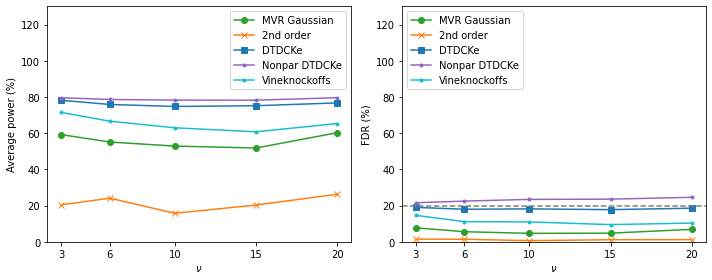

In [21]:
#Average power and FDR plots side-by-side

x_points = np.array(results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Varying degrees of freedom',fontsize=18)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(results["Gaussian Power(%)"])
y2_points = np.array(results["2do Order Power(%)"])
y3_points = np.array(results["Dvine Power(%)"])
y4_points = np.array(results["Nonpar DvinePower(%)"])
y5_points = np.array(results["Vineknockoffs Power(%)"])

ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax1.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")

ax1.set_ylim(0, 130)
ax1.set_xticks(x_points)
ax1.legend(loc="upper right")
ax1.set_xlabel(r"$\nu$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(results["Gaussian FDP(%)"])
y2_points = np.array(results["2do Order FDP(%)"])
y3_points = np.array(results["Dvine FDP(%)"])
y4_points = np.array(results["Nonpar Dvine FDP(%)"])
y5_points = np.array(results["Vineknockoffs FDP(%)"])

ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax2.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")

ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 130)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("t-Markov_linear_regression_13may24.eps", format="eps", dpi=1200)
fig.savefig("t-Markov_linear_regression_13may24.jpg", format="jpg", dpi=300)

fig.show()

### t-Markov logistic regression 

In [13]:
df_simulations_classification_results_1 = pd.read_csv("t-Markov_classification_results_1.csv")
df_simulations_classification_results_2 = pd.read_csv("t-Markov_classification_results_2.csv")
df_simulations_classification_results_3 = pd.read_csv("t-Markov_classification_results_3.csv")
df_simulations_classification_results_4 = pd.read_csv("t-Markov_classification_results_4.csv")
df_simulations_classification_results_5 = pd.read_csv("t-Markov_classification_results_5.csv")

In [14]:
df_simulations_classification_results_1_vineknockoffs = pd.read_csv("t-Markov_classification_results_1_vineknockoffs.csv")
df_simulations_classification_results_2_vineknockoffs = pd.read_csv("t-Markov_classification_results_2_vineknockoffs.csv")
df_simulations_classification_results_3_vineknockoffs = pd.read_csv("t-Markov_classification_results_3_vineknockoffs.csv")
df_simulations_classification_results_4_vineknockoffs = pd.read_csv("t-Markov_classification_results_4_vineknockoffs.csv")
df_simulations_classification_results_5_vineknockoffs = pd.read_csv("t-Markov_classification_results_5_vineknockoffs.csv")

In [15]:
selected_columns_df2 = ['Vineknockoffs Power(%)', 'Vineknockoffs FDP(%)']

df_simulations_classification_results_1 = pd.merge(df_simulations_classification_results_1, df_simulations_classification_results_1_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_2 = pd.merge(df_simulations_classification_results_2, df_simulations_classification_results_2_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_3 = pd.merge(df_simulations_classification_results_3, df_simulations_classification_results_3_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_4 = pd.merge(df_simulations_classification_results_4, df_simulations_classification_results_4_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_5 = pd.merge(df_simulations_classification_results_5, df_simulations_classification_results_5_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')


In [16]:
#Data frame with all the scenarios
df_simulations_classification_results = pd.concat([df_simulations_classification_results_1, df_simulations_classification_results_2, df_simulations_classification_results_3, df_simulations_classification_results_4, df_simulations_classification_results_5], axis=0)
df_simulations_classification_results.reset_index(drop=True, inplace=True)
df_simulations_classification_results

,Unnamed: 0,Varying feature,Success rate,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs Power(%),Vineknockoffs FDP(%)
0,0,3,0.4967,90.0,80.0,100.0,95.0,0.0,0.0,9.0,10.0,90.0,5.0
1,1,3,0.5000,65.0,0.0,85.0,80.0,24.0,0.0,29.0,30.0,80.0,24.0
2,2,3,0.4767,65.0,0.0,85.0,85.0,0.0,0.0,23.0,19.0,80.0,11.0
3,3,3,0.4800,60.0,0.0,65.0,75.0,8.0,0.0,13.0,21.0,60.0,8.0
4,4,3,0.4967,55.0,0.0,75.0,85.0,0.0,0.0,0.0,19.0,65.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,20,0.5600,0.0,0.0,75.0,75.0,0.0,0.0,25.0,29.0,40.0,20.0
496,96,20,0.5467,60.0,0.0,60.0,75.0,8.0,0.0,8.0,6.0,75.0,6.0
497,97,20,0.5167,65.0,50.0,80.0,85.0,0.0,0.0,16.0,19.0,80.0,11.0
498,98,20,0.5333,80.0,0.0,85.0,90.0,0.0,0.0,15.0,22.0,80.0,0.0


### Dataframe with the mean results 

In [17]:
classification_results = df_simulations_classification_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Vineknockoffs Power(%)" ,"Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)","Vineknockoffs FDP(%)"]].groupby("Varying feature").mean()
classification_results

,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Vineknockoffs Power(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs FDP(%)
Varying feature,,,,,,,,,,
3,57.00,16.10,77.10,78.10,71.15,7.24,1.17,17.65,21.96,13.45
6,44.25,17.15,72.40,75.50,58.25,2.77,1.04,18.03,22.03,9.78
10,48.55,19.20,73.55,77.55,61.20,3.88,0.64,17.10,23.88,9.21
15,53.90,17.45,74.25,77.75,58.75,4.53,0.86,16.15,21.64,8.42
20,48.45,16.00,74.65,77.40,62.95,4.68,0.38,17.21,22.23,10.10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3510950/1352914614.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


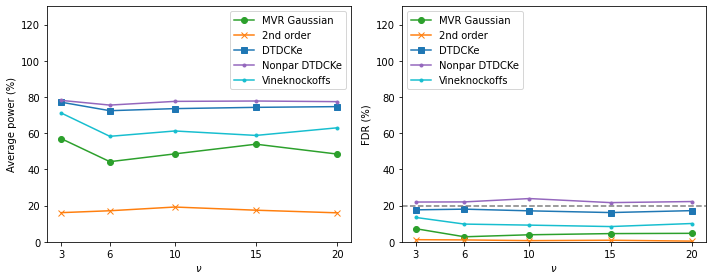

In [20]:
#Average power and FDR plots side-by-side

x_points = np.array(classification_results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Varying degrees of freedom',fontsize=18)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(classification_results["Gaussian Power(%)"])
y2_points = np.array(classification_results["2do Order Power(%)"])
y3_points = np.array(classification_results["Dvine Power(%)"])
y4_points = np.array(classification_results["Nonpar DvinePower(%)"])
y5_points = np.array(classification_results["Vineknockoffs Power(%)"])


ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax1.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")


ax1.set_ylim(0, 130)
ax1.set_xticks(x_points)
ax1.legend(loc="upper right")
ax1.set_xlabel(r"$\nu$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(classification_results["Gaussian FDP(%)"])
y2_points = np.array(classification_results["2do Order FDP(%)"])
y3_points = np.array(classification_results["Dvine FDP(%)"])
y4_points = np.array(classification_results["Nonpar Dvine FDP(%)"])
y5_points = np.array(classification_results["Vineknockoffs FDP(%)"])

ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax2.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")

ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 130)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("t-Markov_logistic_regression_13may24.eps", format="eps", dpi=1200)
fig.savefig("t-Markov_logistic_regression_13may24.jpg", format="jpg", dpi=300)

fig.show()